# 实验七 线性方程组的迭代解法

雅可比（Jacobi）迭代法

In [4]:
import numpy as np

def jacobi_iter(A, b, x0=None, eps=1e-5, max_steps=5000, verbose=False):
    """雅可比（Jacobi）迭代法求解线性方程组:
        A @ x = b
    
    Args:
        A:  np_array_like, 系数矩阵
        b:  np_array_like, 右端常数
        x0: np_array_like, 迭代初值
            default x0=None means using random values.
        eps: float, 精度要求
        max_steps: int, 最大迭代次数
        verbose: bool, 如果计算成功，打印出结果及迭代次数
        
    Returns:
        x: 方程组的解
        
    Raises:
        ValueError: A 和 b 形状不符合要求
        Expection:  达到最大迭代次数，仍不满足精度
    """
    A = np.array(A)
    b = np.array(b)
    
    n, m = A.shape
    if n != m or n != len(b):
        raise ValueError(f"Not match: A({n, m}) and b({len(b)},)")
        
    if not x0:
        x0 = np.random.random(n)
        
    # A =  D - L - U
    
    D = np.diag(np.diag(A))
    L = - np.tril(A, -1)
    U = - np.triu(A, 1)
    
    inv_D = np.linalg.pinv(D)
    
    B = inv_D @ (L + U)
    f = inv_D @ b
    
    x = x0
    i = 0
    for i in range(int(max_steps)):
        x_prev = np.array(x)  # deep copy
        
        x = B @ x + f
        
        if np.all(np.abs(x - x_prev) <= eps):  # 达到精度要求
            break
    else:
        raise Exception(f"cannot reach eps ({eps}) after max_steps ({max_steps}). The last result: x = {x}")
    
    if verbose:
        print(f"jacobi_iter get result x = {x} after {i} iterations.")

    return x

In [86]:
jacobi_iter([[9,-1,-1], [-1,10,-1],[-1,-1,15]], [7,8,13], verbose=True)
# jacobi_iter([[9,-1,-1], [-1,10,-1],[-1,-1,15]], [7,8,13], x0=[99999, 99999, 99999], verbose=True)

jacobi_iter get result x = [0.99999906 0.99999911 0.99999933] after 7 iterations.


array([0.99999906, 0.99999911, 0.99999933])

高斯-赛德尔迭代

In [45]:
def gauss_seidel_iter(A, b, x0=None, eps=1e-5, max_steps=5000, verbose=False):
    """高斯-赛德尔迭代（Gauss–Seidel method）求解线性方程组:
        A @ x = b
    
    Args:
        A:  np_array_like, 系数矩阵
        b:  np_array_like, 右端常数
        x0: np_array_like, 迭代初值
            default x0=None means using random values.
        eps: float, 精度要求
        max_steps: int, 最大迭代次数
        verbose: bool, 如果计算成功，打印出结果及迭代次数
        
    Returns:
        x: 方程组的解
        
    Raises:
        ValueError: A 和 b 形状不符合要求
        Expection:  达到最大迭代次数，仍不满足精度
    """
    A = np.array(A)
    b = np.array(b)
    
    n, m = A.shape
    if n != m or n != len(b):
        raise ValueError(f"Not match: A({n, m}) and b({len(b)},)")
        
    if not x0:
        x0 = np.random.random(n)

    # A =  D - L - U
    
    D = np.diag(np.diag(A))
    L = - np.tril(A, -1)
    U = - np.triu(A, 1)
    
    inv_DsL = np.linalg.pinv(D - L)
    
    B = inv_DsL @ U
    f = inv_DsL @ b
    
    x = x0
    i = 0
    for i in range(int(max_steps)):
        x_prev = np.array(x)  # deep copy
        
        inv_DsL = np.linalg.pinv(D - L)
        x = B @ x + f
        
        if np.all(np.abs(x - x_prev) <= eps):  # 达到精度要求
            break
    else:
        raise Exception(f"cannot reach eps ({eps}) after max_steps ({max_steps}). The last result: x = {x}")
    
    
    if verbose:
        print(f"gauss_seidel_iter get result x = {x} after {i} iterations.")

    return x

In [95]:
gauss_seidel_iter([[9,-1,-1], [-1,10,-1],[-1,-1,15]], [7,8,13], eps=1e-12, verbose=True)

gauss_seidel_iter get result x = [1. 1. 1.] after 10 iterations.


array([1., 1., 1.])

SOR 迭代法

In [46]:
def sor(A, b, x0=None, w=1, eps=1e-5, max_steps=5000, verbose=False):
    """逐次超松驰法（Successive over-relaxation, SOR）求解线性方程组:
        A @ x = b
    
    Args:
        A:  np_array_like, 系数矩阵
        b:  np_array_like, 右端常数
        x0: np_array_like, 迭代初值
            default x0=None means using random values.
        w:  float, 松弛因子 w > 0
            default w=1，即 Gauss–Seidel 迭代
        eps: float, 精度要求
        max_steps: int, 最大迭代次数
        verbose: bool, 如果计算成功，打印出结果及迭代次数
        
    Returns:
        x: 方程组的解
        
    Raises:
        ValueError: w 小于等于 0
        ValueError: A 和 b 形状不符合要求
        Expection:  达到最大迭代次数，仍不满足精度
    """
    if w <= 0:
        raise ValueError(f"unexpected w = {w} < 0")
    
    A = np.array(A)
    b = np.array(b)
    
    n, m = A.shape
    if n != m or n != len(b):
        raise ValueError(f"Not match: A({n, m}) and b({len(b)},)")
        
    if not x0:
        x0 = np.random.random(n)

    # A =  D - L - U
    
    D = np.diag(np.diag(A))
    L = - np.tril(A, -1)
    U = - np.triu(A, 1)
    
    _inv_DsWL = np.linalg.pinv(D - w * L)
    
    B = _inv_DsWL @ ((1-w) * D + w * U)
    f = w * _inv_DsWL @ b
    
    x = x0
    i = 0

    for i in range(int(max_steps)):
        x_prev = np.array(x)  # deep copy
        
        x = B @ x + f
        
        if np.all(np.abs(x - x_prev) <= eps):  # 达到精度要求
            break
    else:
        raise Exception(f"cannot reach eps ({eps}) after max_steps ({max_steps}). The last result: x = {x}")
    
    
    if verbose:
        print(f"sor (w={w}) get result x = {x} after {i} iterations.")

    return x

In [97]:
sor([[9,-1,-1], [-1,10,-1],[-1,-1,15]], [7,8,13], w=1.1, eps=1e-12, verbose=True)

sor (w=1.1) get result x = [1. 1. 1.] after 14 iterations.


array([1., 1., 1.])

In [98]:
A = [[-4, 1, 1, 1], 
     [1, -4, 1, 1],
     [1, 1, -4, 1],
     [1, 1, 1, -4]]
b = [1, 1, 1, 1]

x0 = [0, 0, 0, 0]

jacobi_iter(A, b, x0=x0, eps=1e-9, verbose=True)
gauss_seidel_iter(A, b, x0=x0, eps=1e-9, verbose=True)
sor(A, b, x0=x0, w=1.3, eps=1e-9, verbose=True)

jacobi_iter get result x = [-1. -1. -1. -1.] after 68 iterations.
gauss_seidel_iter get result x = [-1. -1. -1. -1.] after 36 iterations.
sor (w=1.3) get result x = [-1. -1. -1. -1.] after 20 iterations.


array([-1., -1., -1., -1.])

重复的代码有点多，面向对象封装一下：

In [5]:
class SimpleIteration(object):
    """求解线性方程组的迭代法:
        A @ x = b
    
    调用 SimpleIteration 子类实例得到解, e.g. JacobiIteration(A, b)()
    
    """
    def __init__(self, A, b):
        """
        A:  np_array_like, 系数矩阵
        b:  np_array_like, 右端常数
        """
        self.A = np.array(A)
        self.b = np.array(b)

        n, m = self.A.shape
        if n != m or n != len(self.b):
            raise ValueError(f"Not match: A({n, m}) and b({len(b)},)")
        
    @staticmethod
    def _dlu(A):
        """分裂 A:
            A = D - L - U

        Args:
            A: np.array

        Returns:
            (D, L, U)
        """
        D = np.diag(np.diag(A))
        L = - np.tril(A, -1)
        U = - np.triu(A, 1)

        return D, L, U
    
    def _B_f(self):
        """计算迭代 x = B @ x + f 的 B 和 f
        """
        raise NotImplementedError('_B_f')
                
    def __call__(self, x0=None, eps=1e-5, max_steps=5000, verbose=False):
        """线性方程组「简单迭代法」的迭代过程
            x = B @ x + f
            
        其中 B, f 调用 self._B_f() 得到
        

        Args:
            x0: np_array_like, 迭代初值
                default x0=None means using random values.
            eps: float, 精度要求
            max_steps: int, 最大迭代次数
            verbose: bool, 如果计算成功，打印出结果及迭代次数

        Returns:
            x: 方程组的解

        Raises:
            ValueError: x0 形状不符合问题
            Expection:  达到最大迭代次数，仍不满足精度
        """
        if not x0:
            x0 = np.random.random(self.A.shape[0])
        
        x0_shape = np.shape(x0)
        if x0_shape[0] != self.A.shape[0]:
            raise ValueError(f"Not match: A({self.A.shape}) and x0({x0_shape})")
        
        B, f = self._B_f()
        
        x = x0
        i = 0
        for i in range(int(max_steps)):
            x_prev = np.array(x)  # deep copy

            x = B @ x + f

            if np.all(np.abs(x - x_prev) <= eps):  # 达到精度要求
                break
        else:
            raise Exception(f"{self.method_name()} cannot reach eps ({eps}) after max_steps ({max_steps}). The last result: x = {x}")

            
        if verbose:
            print(f"{self.method_name()} get result x = {x} after {i} iterations.")
            
    def method_name(self):
        return self.__class__.__name__

In [6]:
class JacobiIteration(SimpleIteration):
    """雅可比（Jacobi）迭代法求解线性方程组:
        A @ x = b
    """
    def _B_f(self):
        D, L, U = self._dlu(self.A)
        
        inv_D = np.linalg.pinv(D)

        B = inv_D @ (L + U)
        f = inv_D @ self.b
        
        return B, f
    
class GaussSeidel(SimpleIteration):
    """高斯-赛德尔迭代（Gauss–Seidel method）求解线性方程组:
        A @ x = b
    """
    def _B_f(self):
        D, L, U = self._dlu(self.A)
        

        inv_DsL = np.linalg.pinv(D - L)

        B = inv_DsL @ U
        f = inv_DsL @ self.b
        
        return B, f
    
class SOR(SimpleIteration):
    """逐次超松驰法（Successive over-relaxation, SOR）求解线性方程组:
        A @ x = b
    """
    def __init__(self, A, b, w=1):
        """
        w:  float, 松弛因子 w > 0
            default w=1，即 Gauss–Seidel 迭代
        """
        super().__init__(A, b)
        self.w = w
        
    def _B_f(self):
        D, L, U = self._dlu(self.A)
        w = self.w
    
        _inv_DsWL = np.linalg.pinv(D - w * L)

        B = _inv_DsWL @ ((1-w) * D + w * U)
        f = w * _inv_DsWL @ self.b
    
        return B, f
    
    def method_name(self):
        return super().method_name() + f' (w={self.w})'

In [7]:
A = [[-4, 1, 1, 1], 
     [1, -4, 1, 1],
     [1, 1, -4, 1],
     [1, 1, 1, -4]]
b = [1, 1, 1, 1]

x0 = [0, 0, 0, 0]

for method in [JacobiIteration(A, b), GaussSeidel(A, b), SOR(A, b, 0.9), SOR(A, b, 1), SOR(A, b, 1.1)]:
    method(x0=x0, eps=1e-9, verbose=True)

JacobiIteration get result x = [-1. -1. -1. -1.] after 68 iterations.
GaussSeidel get result x = [-1. -1. -1. -1.] after 36 iterations.
SOR (w=0.9) get result x = [-1. -1. -1. -1.] after 46 iterations.
SOR (w=1) get result x = [-1. -1. -1. -1.] after 36 iterations.
SOR (w=1.1) get result x = [-1. -1. -1. -1.] after 28 iterations.


寻找最好的 w：

In [19]:
A = [[-4, 1, 1, 1], 
     [1, -4, 1, 1],
     [1, 1, -4, 1],
     [1, 1, 1, -4]]
b = [1, 1, 1, 1]

for w in np.linspace(0.1, 1.9, 100):
    rs = SOR(A, b, w)(x0=[0, 0, 0, 0], eps=1e-9, verbose=True)

SOR (w=0.1) get result x = [-0.99999996 -0.99999996 -0.99999996 -0.99999996] after 649 iterations.
SOR (w=0.1181818181818182) get result x = [-0.99999997 -0.99999997 -0.99999997 -0.99999997] after 550 iterations.
SOR (w=0.13636363636363635) get result x = [-0.99999997 -0.99999997 -0.99999997 -0.99999997] after 476 iterations.
SOR (w=0.15454545454545454) get result x = [-0.99999998 -0.99999998 -0.99999998 -0.99999998] after 419 iterations.
SOR (w=0.17272727272727273) get result x = [-0.99999998 -0.99999998 -0.99999998 -0.99999998] after 374 iterations.
SOR (w=0.19090909090909092) get result x = [-0.99999998 -0.99999998 -0.99999998 -0.99999998] after 337 iterations.
SOR (w=0.2090909090909091) get result x = [-0.99999998 -0.99999998 -0.99999998 -0.99999998] after 306 iterations.
SOR (w=0.22727272727272727) get result x = [-0.99999999 -0.99999999 -0.99999999 -0.99999999] after 280 iterations.
SOR (w=0.24545454545454545) get result x = [-0.99999999 -0.99999999 -0.99999999 -0.99999999] after

把上面输出的结果写到一个文件 'sorres.txt' 中。然后从中读取 w 与迭代次数：

In [37]:
import re
pattern = r'SOR \(w=(.*?)\) get result .*? after (\d*?) iterations.'

ws = []
iters = []

with open('sorres.txt')  as f:
    for line in f:
        w, i = list(map(lambda x: float(x), 
                            re.findall(pattern, line)[0]))
        ws.append(w)
        iters.append(i)

作图分析：

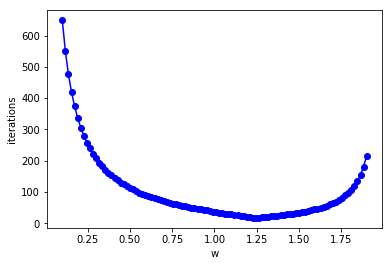

In [38]:
import matplotlib.pyplot as plt

plt.plot(ws, iters, 'bo-')
plt.xlabel('w')
plt.ylabel('iterations')
plt.show()

从中找到使迭代次数最少的 w:

In [40]:
w_best,iters_min = min(zip(ws, iters), key=lambda x: x[1])
print(f'best w: {w_best}\niterations: {int(iters_min)}')

best w: 1.2272727272727273
iterations: 17


一个无法直接解的例子：

In [51]:
A = [[1, -3, -6], 
     [2, 8, -3], 
#      [5, 2, 1]]
b = [1, 21, 8]
np.linalg.solve(A, b)

array([ 1.,  2., -1.])

In [53]:
gauss_seidel_iter(A, b, eps=1e-8, verbose=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less_equal


Exception: cannot reach eps (1e-08) after max_steps (5000). The last result: x = [nan nan nan]

做一些行变化之后就可以解了：

In [56]:
A0 = [[5, 2, 1], 
      [2, 8, -3], 
      [1, -3, -6]]
b0 = [8, 21, 1]
gauss_seidel_iter(A1, b1, eps=1e-8, verbose=True)

gauss_seidel_iter get result x = [ 1.  2. -1.] after 12 iterations.


array([ 1.,  2., -1.])

比较 J 和 GS 的收敛性：

In [57]:
A1 = [[1, 2, -2], [1, 1, 1], [2, 2, 1]]

A2 = [[2, -1, 1], [2, 2, 2], [-1, -1, 2]]

b = [1, 1, 1]

In [58]:
np.linalg.solve(A1, b)

array([-3.,  3.,  1.])

In [59]:
np.linalg.solve(A2, b)

array([ 0.16666667, -0.16666667,  0.5       ])

In [65]:
print('jacobi: ', end='')
j = jacobi_iter(A1, b, verbose=True)
print('gauss_seidel: ', end='')
g = gauss_seidel_iter(A1, b, verbose=True)

jacobi: jacobi_iter get result x = [-3.  3.  1.] after 3 iterations.
gauss_seidel: 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less_equal


Exception: cannot reach eps (1e-05) after max_steps (5000). The last result: x = [nan nan nan]

In [67]:
print('gauss_seidel: ', end='')
# g = gauss_seidel_iter(A2, b, verbose=True)
print('jacobi: ', end='')
j = jacobi_iter(A2, b, verbose=True)

gauss_seidel: gauss_seidel_iter get result x = [ 0.16666863 -0.16666896  0.49999983] after 19 iterations.
jacobi: 

Exception: cannot reach eps (1e-05) after max_steps (5000). The last result: x = [7.99615552e+241 1.08514261e+242 2.57044248e+241]